In [10]:

# for installing packages 
# !pip install pandas
# !pip install matplotlib
# !pip install tqdm
# !pip install mtcnn face_recognition scikit-learn tqdm
# !pip install imagehash
# !pip install --upgrade moviepy

In [4]:

import pandas
import numpy
import cv2 as cv
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [5]:
def enhance_frame_with_gaussian_blur(frame):
    return cv.GaussianBlur(frame, (5, 5), 0)

def enhance_frame_with_median_blur(frame):
    return cv.medianBlur(frame, 5)

def enhance_frame_with_bilateral_filter(frame):
    return cv.bilateralFilter(frame, 9, 75, 75)

def unsharp_mask(image, sigma=1.0, strength=1.5):
    blurred = cv.GaussianBlur(image, (0, 0), sigma)
    sharpened = cv.addWeighted(image, 1 + strength, blurred, -strength, 0)
    return sharpened

def enhance_frame_with_unsharp_mask(frame):
    return unsharp_mask(frame)

## Extracting frames from videos

In [3]:
# base_dir = 'FF++/real'
# output_dir = 'dataset/real'

# for vid in os.listdir(base_dir):
#     video_path = os.path.join(base_dir, vid)
    
#     if os.path.isfile(video_path) and vid.lower().endswith(('.mp4', '.avi', '.mov', '.mkv')):
#         video_output_dir = os.path.join(output_dir, os.path.splitext(vid)[0])
#         extract_frames(video_path, video_output_dir)
#     else:
#         print(f"Skipping non-video file: {vid}")

In [6]:
# extract faces


import face_recognition

demo_img_folder = 'dataset//fake//01_11__meeting_serious__9OM3VE0Y'
output_img_folder = 'outputImages/extracted_faces/01_11__meeting_serious__9OM3VE0Y'

os.makedirs(output_img_folder, exist_ok=True)

for filename in os.listdir(demo_img_folder):
    if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
        input_img_path = os.path.join(demo_img_folder, filename)
        
        image = cv.imread(input_img_path)
        image = enhance_frame_with_unsharp_mask(image)
        
        # Detect face locations in the image
        face_locations = face_recognition.face_locations(image)
        
        for i, (top, right, bottom, left) in enumerate(face_locations):
            # Extract face region
            face_image = image[top:bottom, left:right]

            # Save the cropped face
            face_filename = os.path.join(output_img_folder, f"{filename.split('.')[0]}_face_{i+1}.jpg")
            cv.imwrite(face_filename, face_image)
            print(f"Extracted and saved face {i+1} from {filename} as {face_filename}")

print("Face extraction from all images is complete.")

In [18]:
# Image similarity check using Hashing

from PIL import Image
import imagehash

def compare_hashes(imageA, imageB):
    # Compute perceptual hashes
    hashA = imagehash.phash(imageA)
    hashB = imagehash.phash(imageB)
    
    print(hashA)
    print(hashB)
    # Compute Hamming distance between the hashes
    difference = hashA - hashB
    threshold = 10  # Tune this threshold based on acceptable difference
    match = difference <= threshold
    print(f"Hash match: {match}, Difference: {difference}")
    return match


In [19]:
image1 = "outputImages//extracted_faces//01_11__meeting_serious__9OM3VE0Y//frame_0000_face_1.jpg"
image2 = "outputImages//extracted_faces//01_11__meeting_serious__9OM3VE0Y//frame_0000_face_2.jpg"

image3 = "outputImages//extracted_faces//01_11__meeting_serious__9OM3VE0Y//frame_0010_face_1.jpg"
image4 = "outputImages//extracted_faces//01_11__meeting_serious__9OM3VE0Y//frame_0030_face_1.jpg"

In [20]:
image1 = Image.open(image1)
image2 = Image.open(image2)
image3 = Image.open(image3)
image4 = Image.open(image4)


In [21]:
sim1 = compare_hashes(image1,image2)
sim2 = compare_hashes(image1,image3)
sim3 = compare_hashes(image1,image4)
sim4 = compare_hashes(image2,image4)

print(sim1)
print(sim2)
print(sim3)
print(sim4)

d0910687da5b7e96
c04f6ee4b4103ff8
Hash match: False, Difference: 30
d0910687da5b7e96
d1910585da7b7a96
Hash match: True, Difference: 6
d0910687da5b7e96
d191058dda737a87
Hash match: True, Difference: 10
c04f6ee4b4103ff8
d191058dda737a87
Hash match: False, Difference: 36
False
True
True
False


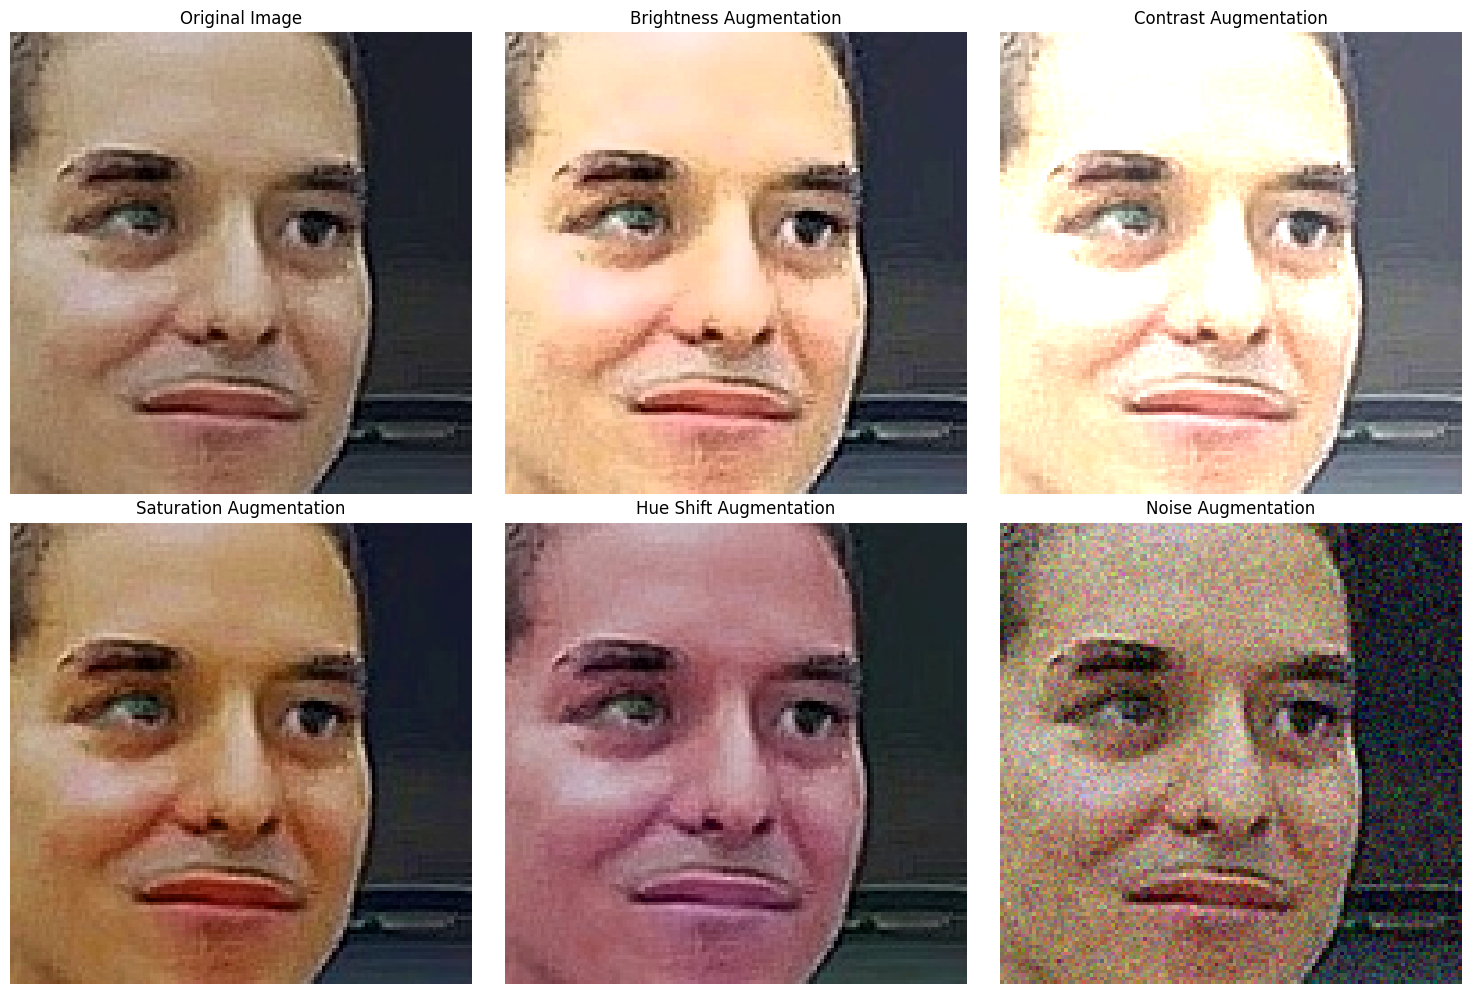

In [4]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

# Define augmentation functions

# Adjust Brightness
def adjust_brightness(image, factor=1.2):
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)  # Convert to HSV color-space
    hsv = np.array(hsv, dtype=np.float64)
    hsv[..., 2] = hsv[..., 2] * factor  # Scale the V (brightness) channel
    hsv[..., 2][hsv[..., 2] > 255] = 255  # Clip brightness values
    hsv = np.array(hsv, dtype=np.uint8)
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

# Adjust Contrast
def adjust_contrast(image, alpha=1.5, beta=0):
    return cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

# Adjust Saturation
def adjust_saturation(image, factor=1.5):
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    hsv = np.array(hsv, dtype=np.float64)
    hsv[..., 1] = hsv[..., 1] * factor  # Scale the S (saturation) channel
    hsv[..., 1][hsv[..., 1] > 255] = 255  # Clip saturation values
    hsv = np.array(hsv, dtype=np.uint8)
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

# Random Hue Shift
def random_hue_shift(image, shift_limit=30):
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    hue_shift = np.random.randint(-shift_limit, shift_limit)
    hsv[..., 0] = (hsv[..., 0] + hue_shift) % 180  # Hue values are circular (0-179 in OpenCV)
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

# Add Random Noise
def add_random_noise(image, mean=0, sigma=15):
    noise = np.random.normal(mean, sigma, image.shape).astype(np.float32)  # Use lower sigma
    noisy_image = np.clip(image + noise, 0, 255).astype(np.uint8)  # Clip values to valid range
    return noisy_image


# Load an image (replace with your image path)
image_path = "outputImages//using_face_recognition//01_11__meeting_serious__9OM3VE0Y//frame_0020_face_1.jpg"  # Replace with your image path
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib

# Apply different color augmentations
brightness_img = adjust_brightness(image, factor=1.5)
contrast_img = adjust_contrast(image, alpha=1.5, beta=50)
saturation_img = adjust_saturation(image, factor=1.5)
hue_shift_img = random_hue_shift(image, shift_limit=30)
noise_img = add_random_noise(image, mean=0, sigma=20)

# Plot the original and augmented images
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

# Display original and augmented images
axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(brightness_img)
axes[1].set_title('Brightness Augmentation')
axes[1].axis('off')

axes[2].imshow(contrast_img)
axes[2].set_title('Contrast Augmentation')
axes[2].axis('off')

axes[3].imshow(saturation_img)
axes[3].set_title('Saturation Augmentation')
axes[3].axis('off')

axes[4].imshow(hue_shift_img)
axes[4].set_title('Hue Shift Augmentation')
axes[4].axis('off')

axes[5].imshow(noise_img)
axes[5].set_title('Noise Augmentation')
axes[5].axis('off')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


Video Compression at different compression levels

In [1]:
from moviepy.editor import VideoFileClip

def compress_video_moviepy(input_path, output_path, resolution=(640, 480), fps=24, bitrate="500k"):
    # Load the video clip
    clip = VideoFileClip(input_path)

    # Resize the video to the target resolution
    clip = clip.resize(newsize=resolution)  # Resize to the new resolution
    
    # Set the target frame rate
    clip = clip.set_fps(fps)

    # Write the compressed video
    clip.write_videofile(output_path, bitrate=bitrate, codec="libx264", audio_codec="aac")
    print(f"Compressed video saved at: {output_path}")

compression_levels = [
    {"resolution": (1280, 720), "fps": 30, "bitrate": "1000k"},
    {"resolution": (854, 480), "fps": 24, "bitrate": "700k"},
    {"resolution": (640, 360), "fps": 15, "bitrate": "500k"}
]

for i, level in enumerate(compression_levels):
    compress_video_moviepy(
        'FF++//fake//01_02__walk_down_hall_angry__YVGY8LOK.mp4', 
        f'compressed_video_{i}.mp4', 
        resolution=level["resolution"], 
        fps=level["fps"], 
        bitrate=level["bitrate"]
    )


Moviepy - Building video compressed_video_0.mp4.
Moviepy - Writing video compressed_video_0.mp4



Moviepy - Done !
Moviepy - video ready compressed_video_0.mp4
Compressed video saved at: compressed_video_0.mp4
Moviepy - Building video compressed_video_1.mp4.
Moviepy - Writing video compressed_video_1.mp4



Moviepy - Done !
Moviepy - video ready compressed_video_1.mp4
Compressed video saved at: compressed_video_1.mp4
Moviepy - Building video compressed_video_2.mp4.
Moviepy - Writing video compressed_video_2.mp4



Moviepy - Done !
Moviepy - video ready compressed_video_2.mp4
Compressed video saved at: compressed_video_2.mp4


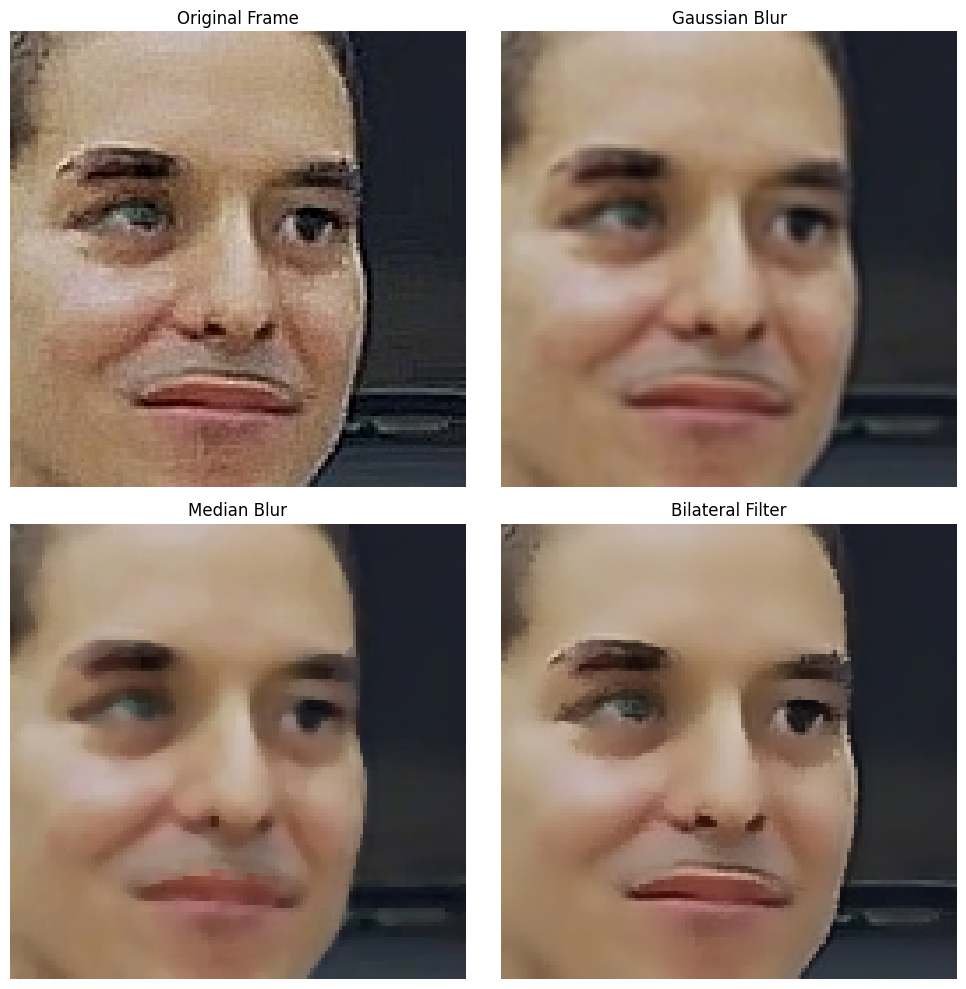

In [5]:
import cv2 as cv
import matplotlib.pyplot as plt

# Define enhancement functions
def enhance_frame_with_gaussian_blur(frame):
    return cv.GaussianBlur(frame, (5, 5), 0)

def enhance_frame_with_median_blur(frame):
    return cv.medianBlur(frame, 5)

def enhance_frame_with_bilateral_filter(frame):
    return cv.bilateralFilter(frame, 9, 75, 75)

def unsharp_mask(image, sigma=1.0, strength=1.5):
    blurred = cv.GaussianBlur(image, (0, 0), sigma)
    sharpened = cv.addWeighted(image, 1 + strength, blurred, -strength, 0)
    return sharpened

def enhance_frame_with_unsharp_mask(frame):
    return unsharp_mask(frame)

image_path = "outputImages//using_face_recognition//01_11__meeting_serious__9OM3VE0Y//frame_0020_face_1.jpg"  # Replace with your image path

frame = cv.imread(image_path)

# Apply the enhancement techniques
gaussian_blur_frame = enhance_frame_with_gaussian_blur(frame)
median_blur_frame = enhance_frame_with_median_blur(frame)
bilateral_filter_frame = enhance_frame_with_bilateral_filter(frame)
unsharp_mask_frame = enhance_frame_with_unsharp_mask(frame)

# Plot all the enhanced frames as a grid
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Original frame (for comparison)
axes[0, 0].imshow(cv.cvtColor(frame, cv.COLOR_BGR2RGB))
axes[0, 0].set_title('Original Frame')
axes[0, 0].axis('off')

# Enhanced frames
axes[0, 1].imshow(cv.cvtColor(gaussian_blur_frame, cv.COLOR_BGR2RGB))
axes[0, 1].set_title('Gaussian Blur')
axes[0, 1].axis('off')

axes[1, 0].imshow(cv.cvtColor(median_blur_frame, cv.COLOR_BGR2RGB))
axes[1, 0].set_title('Median Blur')
axes[1, 0].axis('off')

axes[1, 1].imshow(cv.cvtColor(bilateral_filter_frame, cv.COLOR_BGR2RGB))
axes[1, 1].set_title('Bilateral Filter')
axes[1, 1].axis('off')

# Show the plot
plt.tight_layout()
plt.show()
